In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, sys
import warnings
warnings.filterwarnings('ignore')
import sys
import os

# Import the classes
# Add project root to PYTHONPATH
sys.path.append(os.path.abspath(".."))
# Corrected
from src.dataset import DatasetProcessor
from src.features import FeatureEngineer  # Your file
# from feature_engineering import FeatureEngineer # The class above

from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

2025-11-22 13:23:41.267 | INFO     | src.config:<module>:11 - PROJ_ROOT path is: /home/chetanpatil/Documents/food-delivery-time-prediction


In [2]:
df = pd.read_csv('/home/chetanpatil/Documents/food-delivery-time-prediction/data/raw/Food_Delivery_Data.csv')


In [3]:
# Initialize the processor
processor = DatasetProcessor()

# Clean the data (fit and transform)
df_fe = processor.fit_transform(df)

2025-11-22 13:23:41,828 INFO - Fitting DatasetProcessor on training data...
2025-11-22 13:23:43,335 INFO - Fitted iterative imputer on numeric columns: ['Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries']
2025-11-22 13:23:43,563 INFO - Fitted iterative imputer on coordinate columns: ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']
2025-11-22 13:23:43,578 INFO - Learned categorical distribution for City: 3 values
2025-11-22 13:23:43,606 INFO - Learned categorical distribution for Weatherconditions: 6 values
2025-11-22 13:23:43,626 INFO - Learned categorical distribution for Road_traffic_density: 4 values
2025-11-22 13:23:43,644 INFO - Learned categorical distribution for Festival: 2 values
2025-11-22 13:23:43,659 INFO - Learned categorical distribution for Type_of_order: 4 values
2025-11-22 13:23:43,677 INFO - Learned categorical distribution for Type_of_vehicle: 4 values


In [4]:
df_fe.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_Time_Category
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:45:00,Sunny,High,2,Snack,Motorcycle,0.0,No,Urban,24,Morning
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:50:00,Stormy,Jam,2,Snack,Scooter,1.0,No,Metropolitian,33,Evening
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:45:00,Sandstorms,Low,0,Drinks,Motorcycle,1.0,No,Urban,26,Morning
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:10:00,Sunny,Medium,0,Buffet,Motorcycle,1.0,No,Metropolitian,21,Evening
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:45:00,Cloudy,High,1,Snack,Scooter,1.0,No,Metropolitian,30,Afternoon


In [5]:
df_fe.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
Order_Time_Category            0
dtype: int64

In [6]:
# Separate numerical and categorical columns
num_cols = df_fe.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_fe.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nNumerical Columns:\n", num_cols)
print("\nCategorical Columns:\n", cat_cols)




Numerical Columns:
 ['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Vehicle_condition', 'multiple_deliveries', 'Time_taken(min)']

Categorical Columns:
 ['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City', 'Order_Time_Category']


In [7]:
engineer = FeatureEngineer()
df_engineered = engineer.transform(df_fe)

print(f"Shape after engineering: {df_engineered.shape}")

Shape after engineering: (45593, 31)


In [8]:
df_engineered.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,...,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_Electric_Scooter,Type_of_vehicle_Motorcycle,Type_of_vehicle_Scooter,Order_Time_Category_Morning,Order_Time_Category_Afternoon,Order_Time_Category_Evening,Order_Time_Category_Late Night
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,3,2,0.0,0,...,False,False,True,False,True,False,True,False,False,False
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,4,2,1.0,0,...,False,False,True,False,False,True,False,False,True,False
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,1,0,1.0,0,...,True,False,False,False,True,False,True,False,False,False
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2,0,1.0,0,...,False,False,False,False,True,False,False,False,True,False
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,3,1,1.0,0,...,False,False,True,False,False,True,False,True,False,False


In [9]:
# Separate X and y
target = 'Time_taken(min)'
X = df_engineered.drop(columns=[target])
y = df_engineered[target]

In [10]:
# Scale features (Important for some selection methods)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

Feature Selection Techniques
1. Filter Methods
Filter methods select features based on their statistical properties relative to the target variable, independent of any specific machine learning algorithm. They are fast and computationally efficient.

In [11]:
print("\n--- 1. Filter Methods ---")


--- 1. Filter Methods ---


In [12]:

# A. Correlation Matrix (Linear Relationships)
plt.figure(figsize=(12, 8))
corr = df_engineered.corr()
# Only show correlation with Target
target_corr = corr[[target]].sort_values(by=target, ascending=False)
print("Top 5 Positively Correlated Features:")
print(target_corr.head(6)) 
# [Image of a correlation matrix heatmap]


# B. Mutual Information (Non-linear Relationships)
# Captures complex dependencies that correlation misses
mi = mutual_info_regression(X_scaled, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

print("\nTop 5 Features by Mutual Information:")
print(mi_series.head(5))


Top 5 Positively Correlated Features:
                      Time_taken(min)
Time_taken(min)              1.000000
Road_traffic_density         0.413314
multiple_deliveries          0.384200
distance_km                  0.306176
Delivery_person_Age          0.295060
Festival                     0.287972

Top 5 Features by Mutual Information:
Delivery_person_Ratings    0.162995
Road_traffic_density       0.122274
multiple_deliveries        0.122047
distance_km                0.086142
Delivery_person_Age        0.075986
dtype: float64


<Figure size 1200x800 with 0 Axes>


--- 2. Embedded Methods ---
Top 5 Features by Random Forest Importance:
Delivery_person_Ratings    0.203761
Road_traffic_density       0.128216
multiple_deliveries        0.116051
distance_km                0.106256
Delivery_person_Age        0.097008
dtype: float64


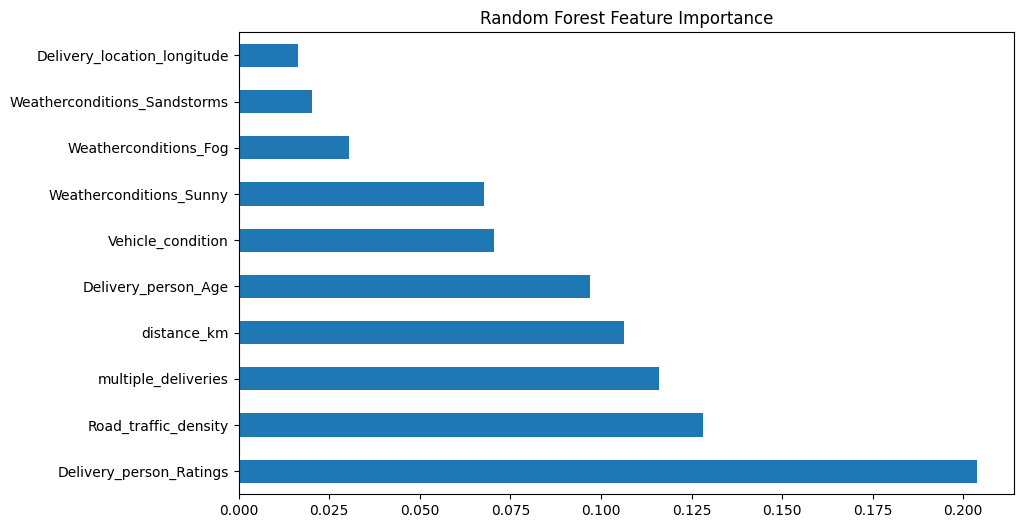

In [13]:
print("\n--- 2. Embedded Methods ---")

# Random Forest Importance
# Trees naturally handle non-linearities and interactions
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Top 5 Features by Random Forest Importance:")
print(importances.head(5))

# Plotting Importance
plt.figure(figsize=(10,6))
importances.head(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.show()
#

In [14]:
print("\n--- 3. Wrapper Methods ---")

# Recursive Feature Elimination (RFE)
# We use a simple Linear Regression here for speed, but you can use RF
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X_scaled, y)

selected_features = X.columns[selector.support_]
print(f"Top 10 Features selected by RFE (Linear):")
print(list(selected_features))


--- 3. Wrapper Methods ---
Top 10 Features selected by RFE (Linear):
['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Road_traffic_density', 'Vehicle_condition', 'multiple_deliveries', 'distance_km']


In [15]:
# Let's look at the features that appeared in BOTH RF Importance and RFE
common_features = list(set(importances.head(10).index) & set(selected_features))
print("\n*** FINAL RECOMMENDATION ***")
print(f"Robust features selected by multiple methods: {common_features}")


*** FINAL RECOMMENDATION ***
Robust features selected by multiple methods: ['multiple_deliveries', 'Road_traffic_density', 'Delivery_person_Ratings', 'Vehicle_condition', 'Delivery_person_Age', 'distance_km', 'Delivery_location_longitude']


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    
    # Calculate VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))]
    
    return vif_data.sort_values(by="VIF", ascending=False)

# Run on your scaled features
# Note: Drop categorical one-hot columns if there are too many for this check
numeric_cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'distance_km', 'multiple_deliveries']
vif_df = calculate_vif(df_engineered[numeric_cols].dropna())

print(vif_df)

                   feature        VIF
1  Delivery_person_Ratings  24.911220
0      Delivery_person_Age  23.881226
2              distance_km   4.214811
3      multiple_deliveries   2.791802


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import HistGradientBoostingRegressor # <--- The XGBoost alternative

# 1. Prepare Data (Same as before)
target = 'Time_taken(min)'
X = df_engineered.drop(columns=[target])
y = df_engineered[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------------------------------
# Model: HistGradientBoostingRegressor
# -------------------------------------------------------
# This is Scikit-Learn's version of a fast gradient booster.
# It is often faster than XGBoost on CPU for datasets < 10M rows.

hgb_model = HistGradientBoostingRegressor(
    learning_rate=0.1,
    max_iter=100,      # Equivalent to n_estimators
    max_depth=6,
    l2_regularization=0.0, # Equivalent to lambda
    random_state=42
)

hgb_model.fit(X_train, y_train)

# Predictions
y_pred_hgb = hgb_model.predict(X_test)

# Evaluation
mae_hgb = mean_absolute_error(y_test, y_pred_hgb)
r2_hgb = r2_score(y_test, y_pred_hgb)

print(f"HistGradientBoosting MAE: {mae_hgb:.2f} minutes")
print(f"HistGradientBoosting R2 Score: {r2_hgb:.2f}")

HistGradientBoosting MAE: 3.35 minutes
HistGradientBoosting R2 Score: 0.80


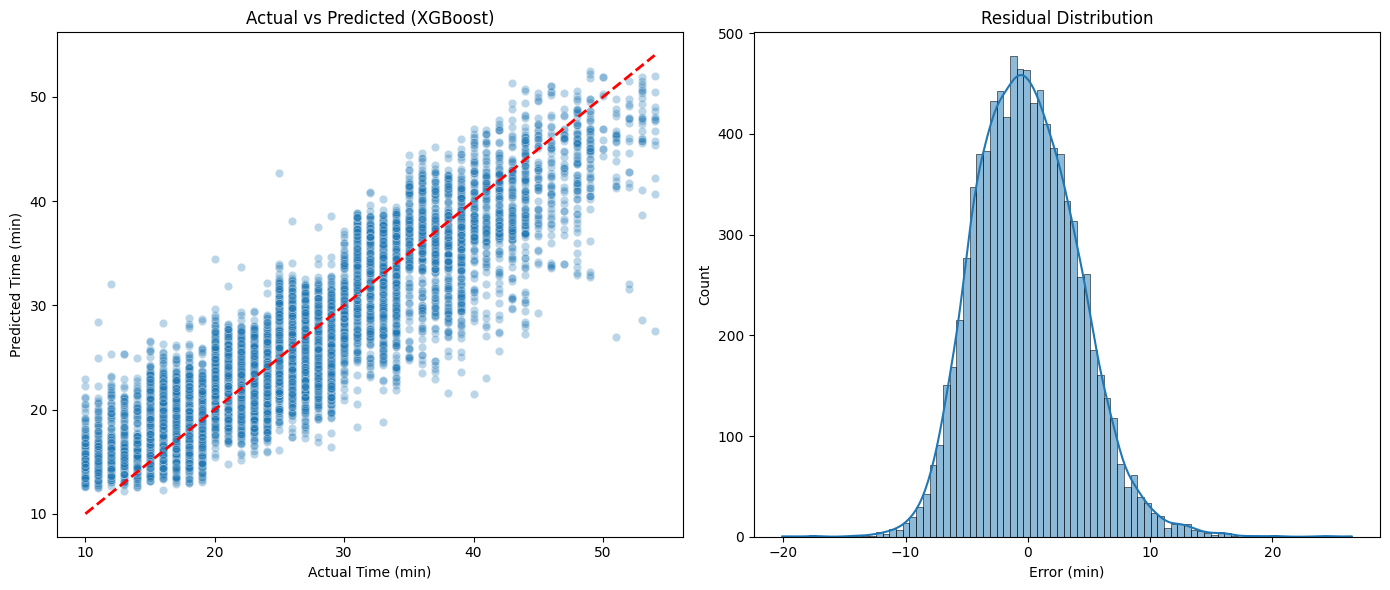

In [ ]:
import matplotlib.pyplot as plt
import seaborn as snsfrom sklearn.pipeline import Pipeline

# Define the full pipeline
final_pipeline = Pipeline([
    ('preprocessor', DatasetProcessor()),      # Your cleaning class
    ('engineer', FeatureEngineer()),           # Your engineering class
    ('model', hgb_model.HistGradientBoostingRegressor(n_estimators=500)) # Your best model
])

# Now you can just do:
# final_pipeline.fit(raw_train_data, raw_train_labels)
# predictions = final_pipeline.predict(raw_new_data)

plt.figure(figsize=(14, 6))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_hgb, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect prediction line
plt.xlabel("Actual Time (min)")
plt.ylabel("Predicted Time (min)")
plt.title("Actual vs Predicted (XGBoost)")

# Plot 2: Residuals (Errors)
# We want these to be randomly distributed around 0.
residuals = y_test - y_pred_hgb
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel("Error (min)")
plt.title("Residual Distribution") # Should be a normal distribution centered at 0

plt.tight_layout()
plt.show()